In [2]:
import pandas as pd
import csv
import os
from PIL import Image
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from torchvision.io import read_image
import numpy as np

base = '/opt/ml/input/data/train/'
csv_path = os.path.join(base, 'train.csv')
img_path = os.path.join(base, 'images')

100%|██████████| 18/18 [00:00<00:00, 187.75it/s]


[2745, 2050, 415, 3660, 4085, 545, 549, 410, 83, 732, 817, 109, 549, 410, 83, 732, 817, 109]
18


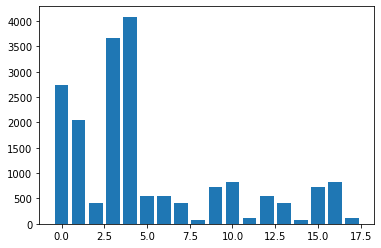

In [12]:
import glob
import os
from tqdm import tqdm

train = '/opt/ml/input/purified/train/'

cls = []
d = {}

for i in tqdm(range(18)):
    tmp = 0
    tmp += len(glob.glob( train + str(i) + '/' + '*.jpg', recursive=True))
    tmp += len(glob.glob( train + str(i) + '/' + '*.png', recursive=True))
    tmp += len(glob.glob( train + str(i) + '/' + '*.jpeg', recursive=True))
    cls.append(tmp)
    d[i] = tmp


print(cls)
print(len(cls))
idx = [x for x in range(18)]
plt.bar(idx, cls)
plt.show()

In [3]:
import glob

base = '/opt/ml/input/data/train/images/'
base = '/opt/ml/input/new_test/'
# base = '/opt/ml/input/data/eval/'
jpg = glob.glob(base + '**/*.jpg', recursive=True)
png = glob.glob(base + '**/*.png', recursive=True)
jpeg = glob.glob(base + '**/*.jpeg', recursive=True)

print(len(jpg) + len(png) + len(jpeg))
print(len(jpg))
print(len(png))
print(len(jpeg))

12600
12600
0
0


In [4]:
from torchvision.datasets import ImageFolder
import random
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
dataroot = '/opt/ml/input/new'

def train_val_dataset(dataset, val_split=0.2):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    # , stratify=dataset.targets
    datasets = {}
    print(val_idx[0])
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets



dataset = ImageFolder(dataroot)
# dataset.targets

In [5]:
dataset = train_val_dataset(dataset)
val = dataset['val']

5241


In [6]:
len(val.indices)

3780

In [18]:
# from collections import Counter
# from tqdm import tqdm
# val.dataset[16419]
# cnt = Counter()

# for idx, ten in enumerate(tqdm(val.indices)):
#     cnt.update([val.dataset[ten][1]])

# for k, v in cnt.items():
#     print(f'{k}: {v}')

In [19]:
# cnt = Counter()

# for idx, ten in enumerate(tqdm(val.indices)):
#     cnt.update([val.dataset[ten][1]])

# for k, v in cnt.items():
#     print(f'{k}: {v}')

In [31]:
total = 0
for v in cnt.values():
    total += v

print(total)

18900


In [7]:
i = random.randint(0, 18900)

img_path, classes = dataset.samples[i]
img = read_image(img_path)
print(dataset.samples[i])
imshow(np.asarray(img).transpose((1,2,0)))


AttributeError: 'dict' object has no attribute 'samples'

In [8]:
src = base = '/opt/ml/input/data/train/images/'

for idx, img in enumerate(glob.glob(src + '**/*.*', recursive=True)):
    dir_name, ext = os.path.splitext(img)
    is_masked = dir_name.split('/')[-1]
    etc = dir_name.split('/')[-2].split('_')
    features = [is_masked[0], etc[1], int(etc[3])]
    print(etc)

    if idx > 10 : break

['001108', 'female', 'Asian', '23']
['001108', 'female', 'Asian', '23']
['001108', 'female', 'Asian', '23']
['001108', 'female', 'Asian', '23']
['001108', 'female', 'Asian', '23']
['001108', 'female', 'Asian', '23']
['001108', 'female', 'Asian', '23']
['001817', 'male', 'Asian', '23']
['001817', 'male', 'Asian', '23']
['001817', 'male', 'Asian', '23']
['001817', 'male', 'Asian', '23']
['001817', 'male', 'Asian', '23']


In [9]:
base = '/opt/ml/input/'
src = os.path.join(base, 'data/eval')

tot = len(glob.glob(src + '/images/' + '**/*.*', recursive=True))
# for idx, img in enumerate(glob.glob(src + '/images/' + '**/*.*', recursive=True)):
#     dir_name, ext = os.path.splitext(img)
#     # print(f'{dir_name.split("/")[-1]}.{ext}')
print(tot)

12600


In [10]:
from torchvision import transforms

def get_transforms_img(im):
    # im = torchvision.transforms.Resize((224,224))(im)
    # im = torchvision.transforms.RandomHorizontalFlip()(im)
    # im = torchvision.transforms.CenterCrop((150,150))(im)

    im = transforms.Compose([
                        transforms.CenterCrop((380,380)),
                        transforms.Resize((64,64)),
                        transforms.RandomHorizontalFlip(0.5)
                        # transforms.RandomHorizontalFlip(),
    ])(im)
    
    return im
i = 0

<class 'str'>
(512, 384, 3)


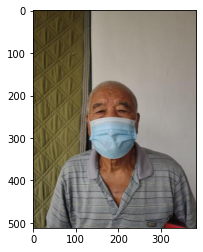

In [11]:


all_img = glob.glob(src +'/images/' +  '**/*.*', recursive=True)

print(type(all_img[0]))
img = Image.open(all_img[0])
imshow(np.asarray(img))
print(np.asarray(img).shape)

torch.Size([3, 512, 384])


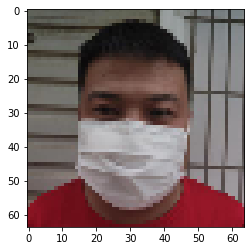

In [17]:
selc_img = '/opt/ml/input/new/0/'
img_name = '000309_male_29_mask3'

selc_img = selc_img + img_name + '.jpg'
img = read_image(selc_img)
print(img.shape)
img = get_transforms_img(img)
imshow(np.asarray(img).transpose((1,2,0)))

In [ ]:
i = random.randint(0, 18900)

img_path, _ = dataset.samples[i]


###########Face Racognition#########
image = face_recognition.load_image_file(img_path)
cor = face_recognition.face_locations(image)[0]

img = cv2.imread(img_path)
blue = (255,0,0)
img = cv2.rectangle(img, (cor[0], cor[1]), (cor[2], cor[3]), blue, 3)
imshow(img)

torch.Size([3, 512, 384])


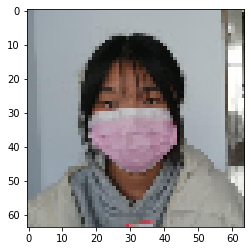

In [12]:
i += 1
img = read_image(all_img[i])
print(img.shape)
img = get_transforms_img(img)
imshow(np.asarray(img).transpose((1,2,0)))

torch.Size([3, 512, 384])


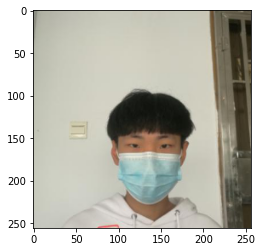

In [119]:
i+=1
img = read_image(all_img[i])
print(img.shape)
img = get_transforms_img(img)
imshow(np.asarray(img).transpose((1,2,0)))

In [11]:
list_dir = os.listdir(img_path)
real_dir = []
for d in list_dir:
    if d.find('._')==-1:
        real_dir.append(d)

In [30]:
dataframe[['id', 'gender']]

,id,gender
0,000001,female
1,000002,female
2,000004,male
3,000005,female
4,000006,female
...,...,...
2695,006954,male
2696,006955,male
2697,006956,male
2698,006957,male


In [28]:
len(real_dir)
pd.to_numeric(dataframe['id']).values

ValueError: Unable to parse string "000600-1" at position 207

In [19]:
import torch
torch.tensor(dataframe['id'].values, dtype=torch.float32)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.